Hello Future Engineers, Nice to meet you!

In this notebook, we will learn together how to deal with data and apply Regression algorithms. So... make your coffee and come back to start coding, I promise I will wait for you.

Hello again my friend, I wish your coffee is delicious

# Let's Start, 

First we import our helpers and I want to know the order of them is the same order of using them.



In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import warnings

sns.set()
%matplotlib inline
warnings.filterwarnings("ignore")

# 1- Data
Our data has 2 files train and test so we will import them.

1. **Train File:** We will deal with it in this notebook.
2. **Test File:** This file we will predict its **"y"** after training our model.

> Notice to drop **"Id"** column from **2 DataFrames** because I think this feature is **useless**. 

In [2]:
df_train = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
df_test = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
submission = pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')

df_train = df_train.drop('Id', axis=1)
df_test = df_test.drop('Id', axis=1)

In [3]:
df_train.head(-10)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1445,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,129000
1446,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,157900
1447,60,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,240000
1448,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000


In [4]:
df_train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

These are our **columns** and we don't know much about them, but before that, but first We will meet our **output** or **"y"**.

# 2- Say Hi to SalePrice!

In [5]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

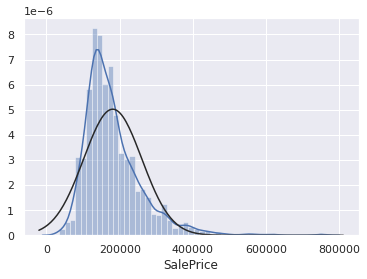

In [6]:
sns.distplot(df_train['SalePrice'], fit=stats.norm)
plt.show()

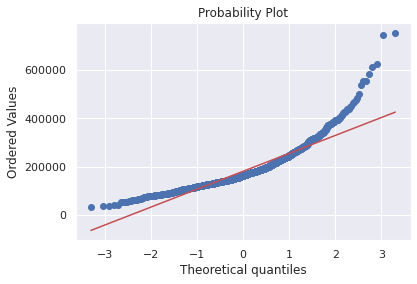

In [7]:
stats.probplot(df_train['SalePrice'], plot=plt)
plt.show()

Ooh **SalePrice**, Nice hairstyle by the way.
Can I scan your invitation, please?

In [8]:
print('SalePrice Skewness: ', df_train['SalePrice'].skew())
print('SalePrice Kurtosis: ', df_train['SalePrice'].kurt())

SalePrice Skewness:  1.8828757597682129
SalePrice Kurtosis:  6.536281860064529


OK Sir, Have a nice time.

# 3- SalePrice Friends

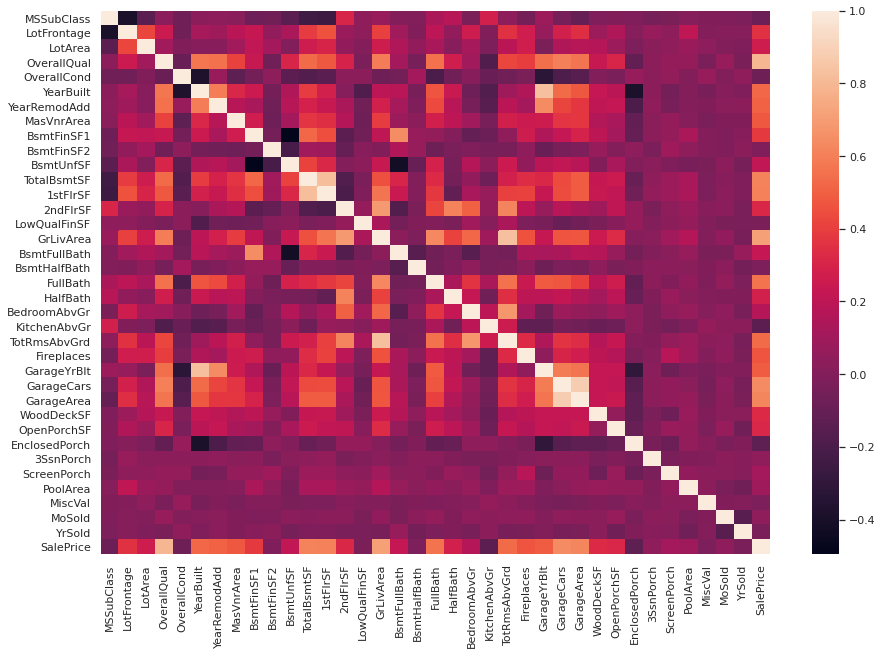

In [9]:
corrmat = df_train.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corrmat)
plt.show()

Ooh, **SalePrice** has lots of friends. In my opinion, he wants to talk to his **close friends** only.

I suggest entering a private room, Unfortunately, the room fits **11** people so **SalePrice** will enter the room with **10 friends only**.

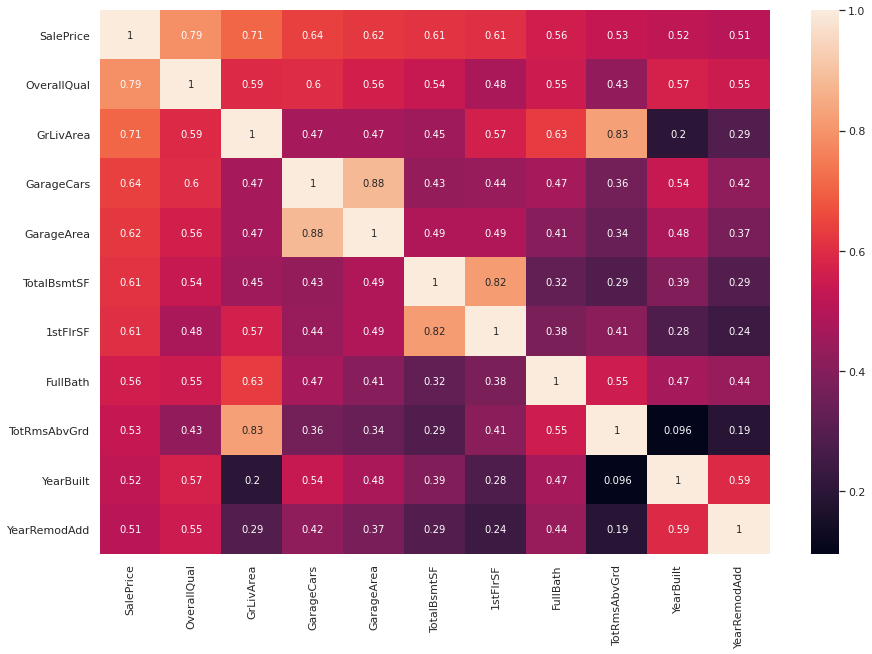

In [10]:
cols = corrmat.nlargest(11, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot=True, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

The friends have a lot of talk with each other.

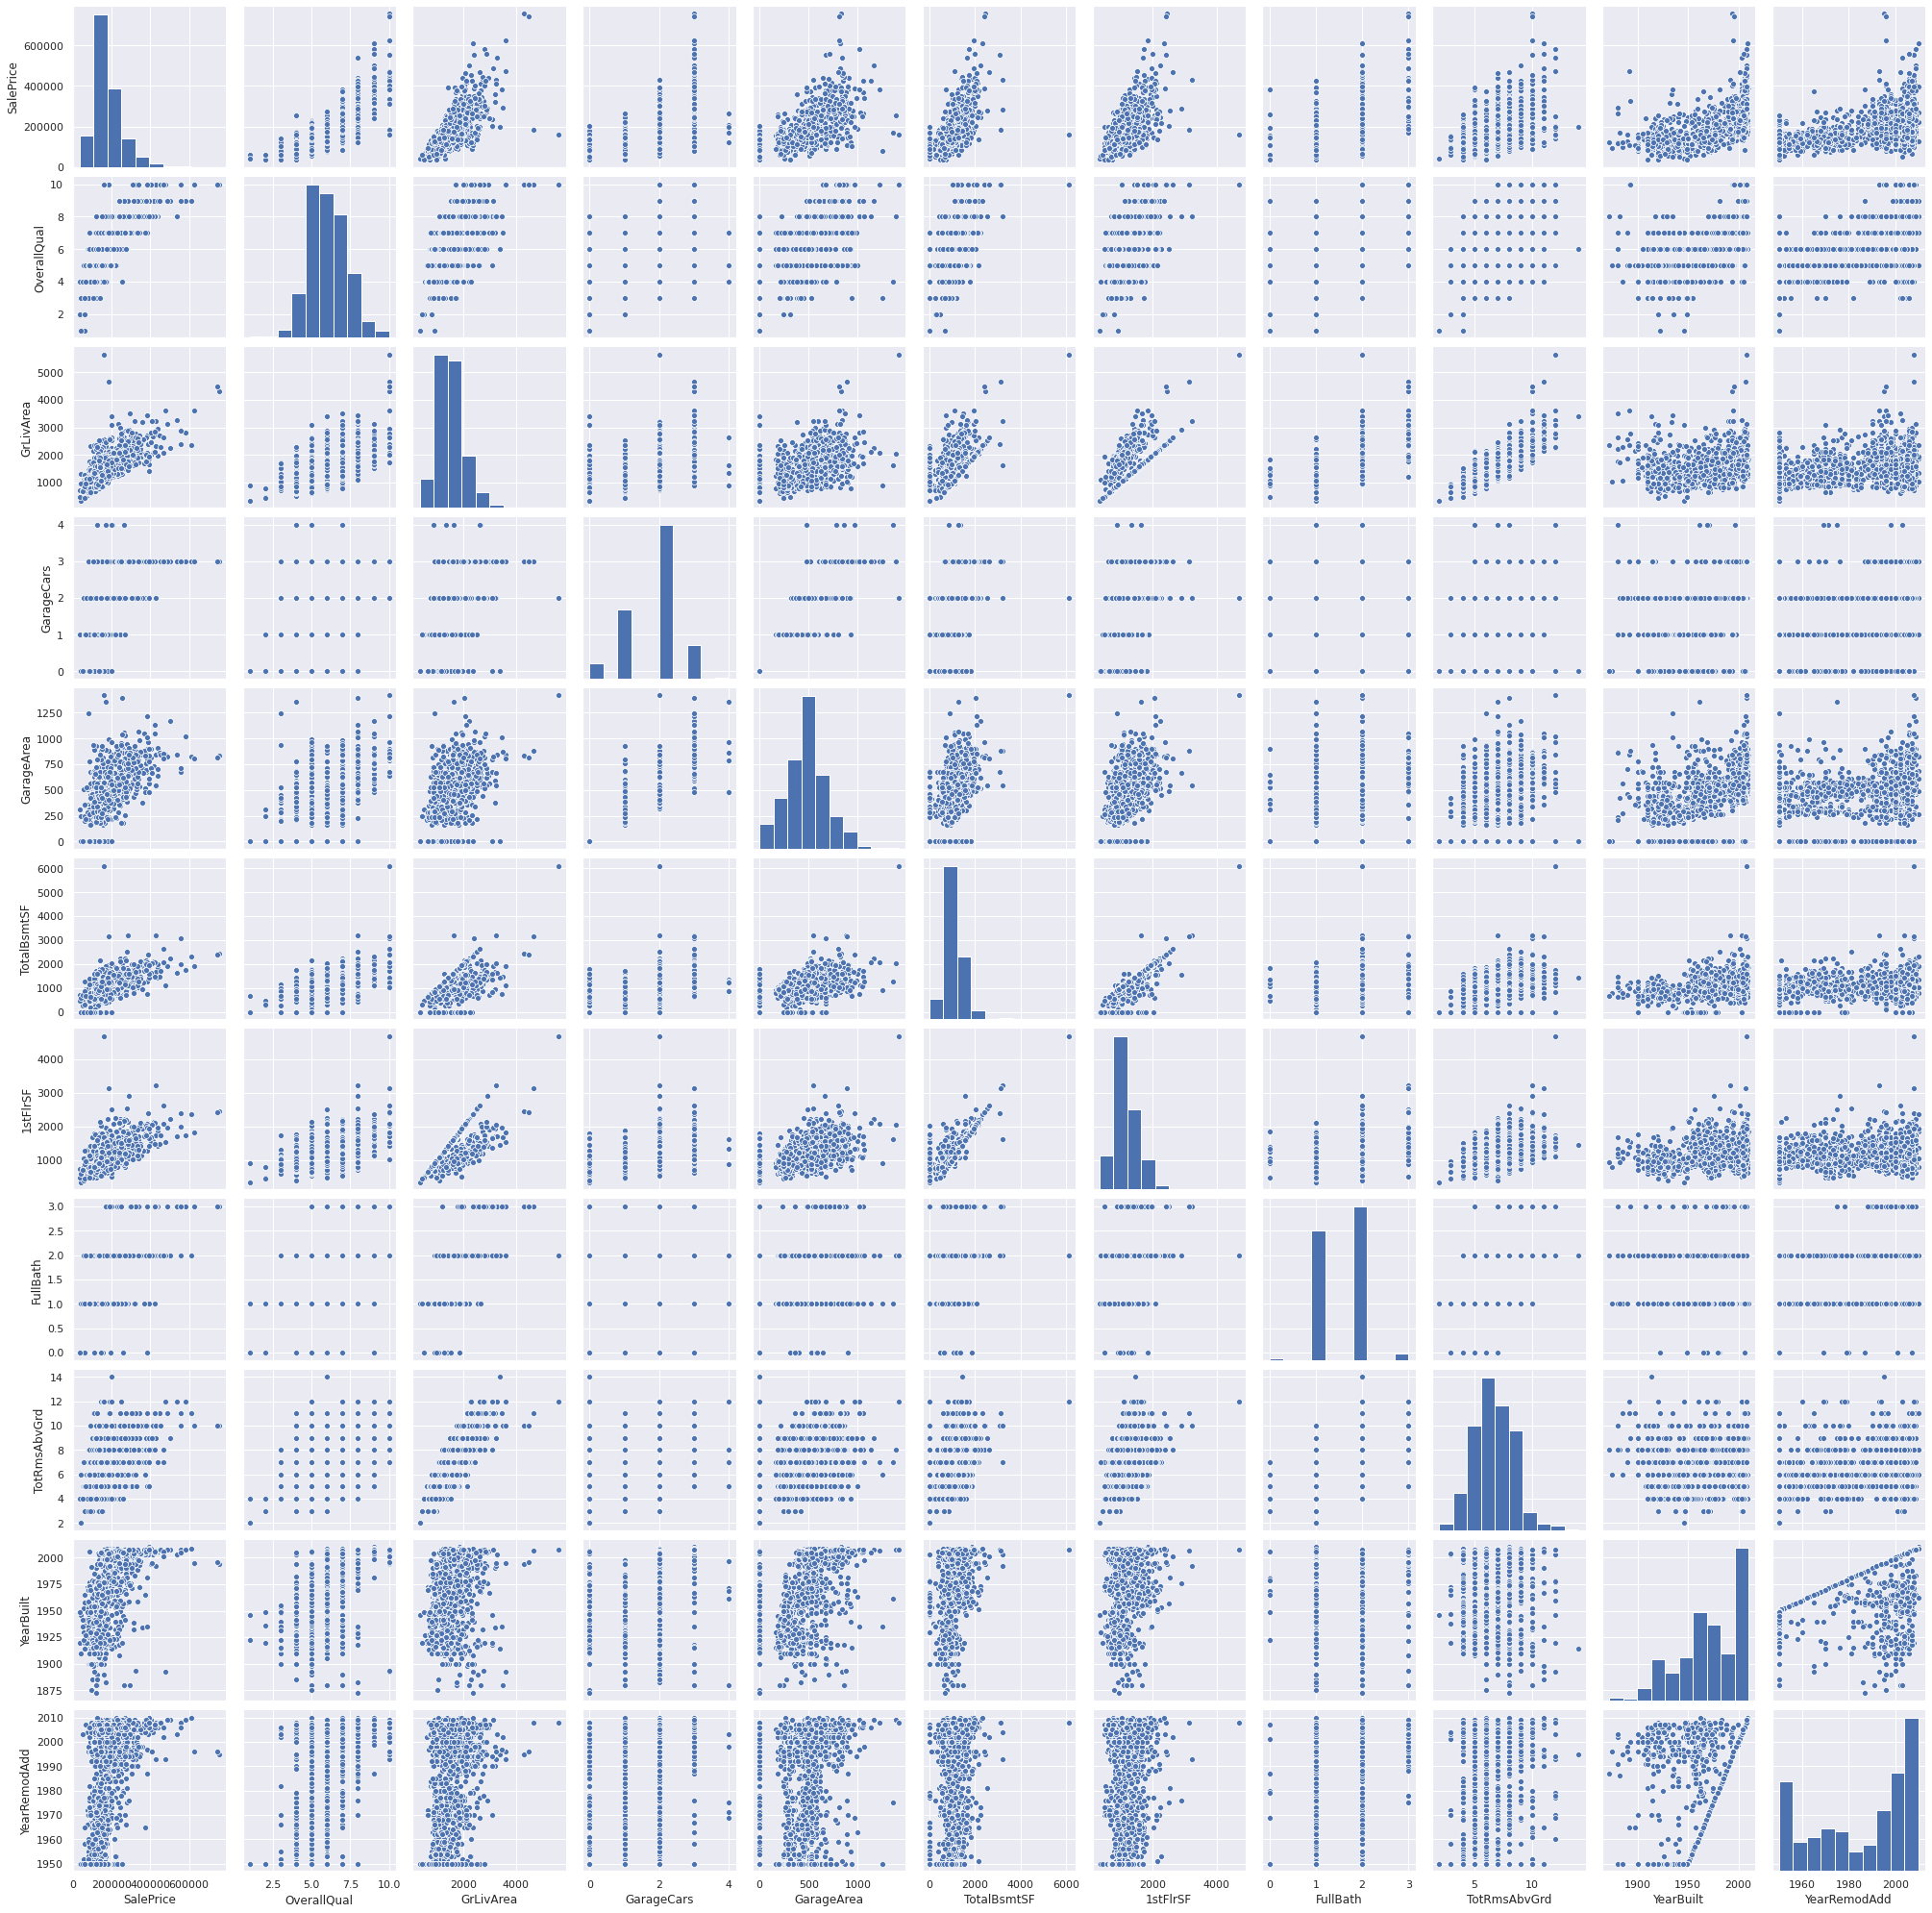

In [11]:
sns.pairplot(df_train[cols])
plt.show()

# 4- Get Relation With SalePrice

Our friend is very shy so We will facilitate communication with his friends.

After checking relations between friends, We will focus on 3 of them and their relation with **SalePrice**

**GetRelationWithSalePrice** is a very simple function, it takes 4 parameters:
1. **X:** **Column** or **Feature** or "The friend of our friend"
2. **show:** Type of relation
3. **x_figsize:** Width of figure
3. **y_figsize:** Height of figure

From the frist great **"SalePrice.describe()"**, we knew the **max** of **"SalePrice"** is **"755000"** so we will make **"ylim"** = (0,**800000**)

In [12]:
def GetRelationWithSalePrice(X, show, x_figsize, y_figsize):
    plt.figure(figsize=(x_figsize, y_figsize))
    plt.ylim(0,800000)
    plt.title("Relation Between " + X + " and SalePrice")
    plt.ylabel("SalePrice"), plt.xlabel(X)
    eval(show)(x=df_train[X], y=df_train['SalePrice'])
    plt.show()

**4.a- Say Hi to GrLivArea!**

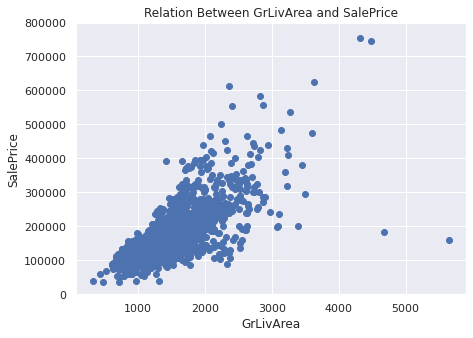

In [13]:
GetRelationWithSalePrice('GrLivArea', 'plt.scatter', 7, 5)

I can see an **anomaly point** If we keep it, it will take us to mislead so let's drop this row.
we can find, it's the **max** value of the **GrLivArea** column.

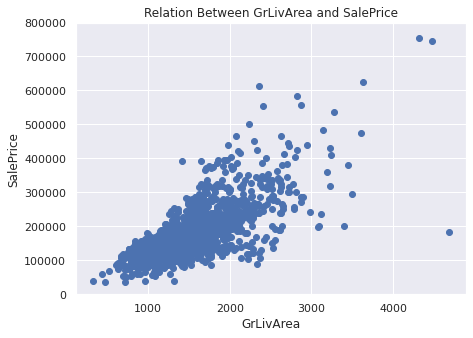

In [14]:
df_train = df_train.drop(df_train['GrLivArea'].argmax())
GetRelationWithSalePrice('GrLivArea', 'plt.scatter', 7, 5)

**4.b- Say Hi to OverallQual!**

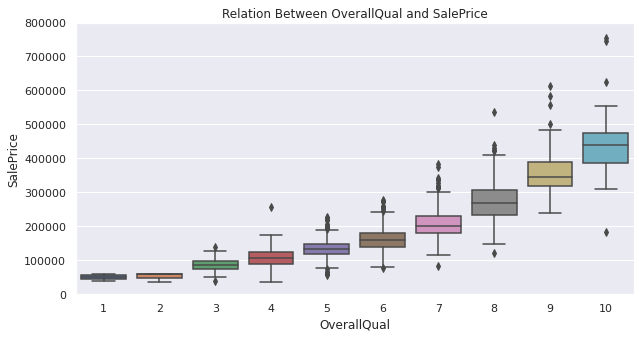

In [15]:
GetRelationWithSalePrice('OverallQual', 'sns.boxplot', 10, 5)

**4.c- Say Hi to YearBuilt!**

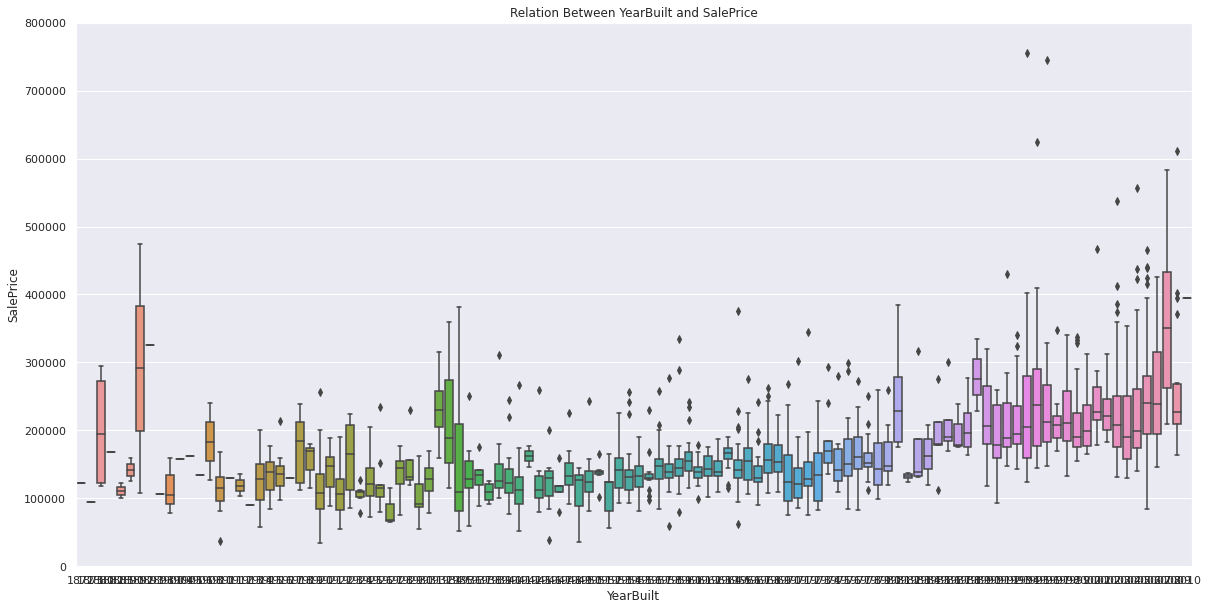

In [16]:
GetRelationWithSalePrice('YearBuilt', 'sns.boxplot', 20, 10)

# # 5- Missing Data
We will know more about our data and its **null values**.

In [17]:
train_total = df_train.isnull().sum().sort_values(ascending=False)
train_percentage = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending=False)
train_missing_data = pd.concat([train_total, train_percentage], axis=1, keys=['Total', 'Percentage'])
train_missing_data.head(20)

,Total,Percentage
PoolQC,1453,0.995888
MiscFeature,1405,0.962988
Alley,1368,0.937629
Fence,1178,0.807402
FireplaceQu,690,0.472927
LotFrontage,259,0.177519
GarageType,81,0.055517
GarageCond,81,0.055517
GarageFinish,81,0.055517
GarageQual,81,0.055517


In [18]:
print(df_train.shape)

(1459, 80)


We will remove **null values columns** from **train** and **test** data except **"Electrical"** because it has 1 row only with **NaN**

In [19]:
df_train = df_train.drop((train_missing_data[train_missing_data['Total'] > 1]).index,1)
df_test = df_test.drop((train_missing_data[train_missing_data['Total'] > 1]).index,1)

df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)

print("Train Shape:", df_train.shape)
print("Test Shape:", df_test.shape)

Train Shape: (1458, 62)
Test Shape: (1459, 61)


**Finally X_train and y are Ready**

We will update **"y"** after dropping rows and make the **"Log"** transformation.

> Notice to drop **"SalPrice"** from **X_train**.


In [20]:
X_train = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']

Now We will deal with **Missing Data** in **Test Data**.

In [21]:
test_total = df_test.isnull().sum().sort_values(ascending=False)
test_percentage = (df_test.isnull().sum() / df_test.isnull().count()).sort_values(ascending=False)
test_missing_data = pd.concat([test_total, test_percentage], axis=1, keys=['Total', 'Percentage'])
test_missing_data.head(20)

,Total,Percentage
MSZoning,4,0.002742
BsmtHalfBath,2,0.001371
BsmtFullBath,2,0.001371
Functional,2,0.001371
Utilities,2,0.001371
Exterior1st,1,0.000685
KitchenQual,1,0.000685
GarageCars,1,0.000685
GarageArea,1,0.000685
BsmtFinSF1,1,0.000685


Let't apply **SimpleImputer** on data with **strategy='most_frequent'**.

> You should give **X_test DataFrame columns names** because **SimpleImputer** class takes **pandas dataframes** and returns **numpy array** so we **Retrieve columns names**.**

In [22]:
Imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
X_test = pd.DataFrame(Imputer.fit_transform(df_test), columns=df_test.columns)

# 6- Let's LabelEncoder

In [23]:
train_len = len(X_train)

df = pd.concat([X_train, X_test], ignore_index=True)

Encoder = LabelEncoder()
categorical = df.select_dtypes(include=['object'])

for column in categorical:
    df[column] = Encoder.fit_transform(df[column].astype('str'))

X_train = df[:train_len]
X_test = df[train_len:]

print("DF Shape:", df.shape)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

DF Shape: (2917, 61)
Train Shape: (1458, 61)
Test Shape: (1459, 61)


Everything is OK, Let's check the **categorical data**.

In [24]:
df.head(-10)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,3,1585,1,3,3,0,4,0,5,...,212,0,0,0,0,0,4,2,8,4
1,5,3,1861,1,3,3,0,2,0,24,...,0,0,0,0,0,0,7,1,8,4
2,10,3,282,1,0,3,0,4,0,5,...,186,0,0,0,0,0,11,2,8,4
3,11,3,1849,1,0,3,0,0,0,6,...,171,116,0,0,0,0,4,0,8,0
4,10,3,688,1,0,3,0,2,0,15,...,235,0,0,0,0,0,3,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,5,3,1006,1,3,3,0,4,0,11,...,0,26,0,0,0,0,7,0,8,4
2903,15,4,1304,1,3,3,0,4,0,11,...,193,0,0,0,0,0,2,0,8,4
2904,2,4,988,1,3,3,0,4,0,10,...,0,0,0,0,0,0,7,0,8,4
2905,5,3,40,1,0,3,0,4,0,11,...,23,0,0,0,0,0,1,0,8,4


In [25]:
X_train.head(-10)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,3,1585,1,3,3,0,4,0,5,...,212,0,0,0,0,0,4,2,8,4
1,5,3,1861,1,3,3,0,2,0,24,...,0,0,0,0,0,0,7,1,8,4
2,10,3,282,1,0,3,0,4,0,5,...,186,0,0,0,0,0,11,2,8,4
3,11,3,1849,1,0,3,0,0,0,6,...,171,116,0,0,0,0,4,0,8,0
4,10,3,688,1,0,3,0,2,0,15,...,235,0,0,0,0,0,3,2,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1443,14,3,1574,1,3,3,0,4,0,19,...,0,107,0,0,0,0,7,1,8,4
1444,5,3,982,1,0,3,0,1,0,11,...,180,0,0,0,0,0,6,4,8,4
1445,10,3,0,1,3,3,0,4,0,5,...,216,0,0,0,0,0,3,1,8,4
1446,9,3,373,1,3,3,0,4,0,7,...,125,0,0,0,0,0,7,1,8,4


In [26]:
X_test.head(-10)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1458,5,2,346,1,3,3,0,4,0,12,...,0,0,0,13,0,0,8,4,8,4
1459,5,3,689,1,0,3,0,0,0,12,...,172,0,0,0,0,4,8,4,8,4
1460,10,3,653,1,0,3,0,4,0,8,...,169,0,0,0,0,0,5,4,8,4
1461,10,3,1944,1,0,3,0,4,0,8,...,172,0,0,0,0,0,8,4,8,4
1462,0,3,1135,1,0,1,0,4,0,22,...,233,0,0,26,0,0,0,4,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,5,3,1006,1,3,3,0,4,0,11,...,0,26,0,0,0,0,7,0,8,4
2903,15,4,1304,1,3,3,0,4,0,11,...,193,0,0,0,0,0,2,0,8,4
2904,2,4,988,1,3,3,0,4,0,10,...,0,0,0,0,0,0,7,0,8,4
2905,5,3,40,1,0,3,0,4,0,11,...,23,0,0,0,0,0,1,0,8,4


# 7- Let's Party

After tring many **Algorithms: [LinearRegression, Laso, SVR ,DecisionTreeRegressor, RandomForestRegressor, KNeighborsRegressor]**, I found **GradientBoostingRegressor** is the best algorithm for this data.

We will check **test score** by **cross_val_score** then **fit** the model. 

In [27]:
GBR = GradientBoostingRegressor(loss='huber', n_estimators=2000, learning_rate=.05)

cv_score = cross_val_score(GBR, X_train, y, cv=10, n_jobs=-1)

print(f"GBR Model Max Test Score: {cv_score.max().round(4)*100}%")

GBR Model Max Test Score: 92.75999999999999%


In [28]:
GBR.fit(X_train, y)

print(f"GBR Model Train Score: {GBR.score(X_train, y).round(4)*100}%")

GBR Model Train Score: 99.15%


# 8- Feature Importane
These are the 10 most importan features.

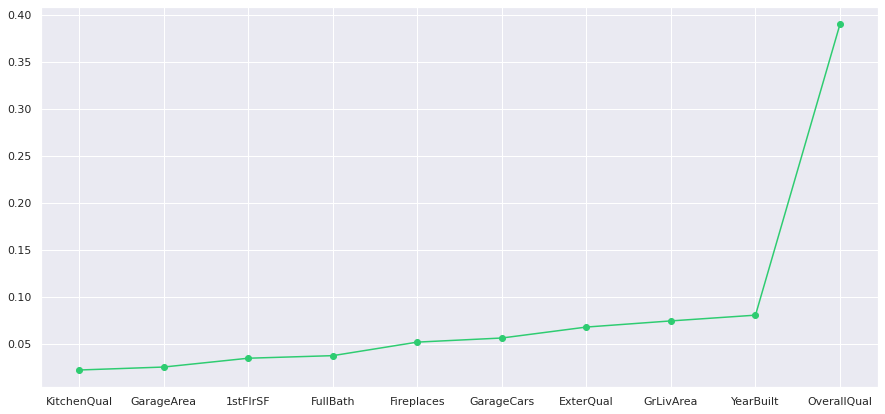

In [29]:
importance = GBR.feature_importances_
indices = importance.argsort()[-10:]
plt.figure(figsize=(15,7))
plt.plot(X_train.columns[indices], importance[indices], 'o-', color="#2ecc71")
plt.show()

# 9- Let's Predict

In [30]:
y_pred = GBR.predict(X_test)

print("y_pred shape:", y_pred.shape)
print("submission shape:", submission.shape)

submission.head(-10)

y_pred shape: (1459,)
submission shape: (1459, 2)


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1444,2905,223667.404552
1445,2906,169335.310624
1446,2907,167411.028352
1447,2908,187709.555004


# 10- Output

In [31]:
submission['SalePrice'] = y_pred
submission.head(-10)

,Id,SalePrice
0,1461,131248.832738
1,1462,158897.707806
2,1463,181862.899455
3,1464,199487.827898
4,1465,183890.009594
...,...,...
1444,2905,85774.633089
1445,2906,212531.640127
1446,2907,114763.711665
1447,2908,135510.655752


In [32]:
submission.to_csv('submission.csv', index=False)